### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from pathlib import Path
import shutil
import random
from skimage.io import imread
from PIL import Image

# Train Test split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Importing fitzpatrick17k dataset

In [3]:
df_original = pd.read_csv(r".\fitzpatrick17k.csv")
df = df_original.copy()
df

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,5e82a45bc5d78bd24ae9202d194423f8,3,3,drug induced pigmentary changes,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicmminoc...
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...
...,...,...,...,...,...,...,...,...,...
16572,cd90e491ddaa92f0f4eb07f73aa09f64,5,5,scleroderma,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4529,httpwwwatlasdermatologicocombrimgimageId4529.jpg
16573,5f1ed6de6a9110d7dc580a6a0312af63,4,5,pityriasis rosea,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=5630,httpwwwatlasdermatologicocombrimgimageId5630.jpg
16574,f198aaf1f0550c2464b285454d34926e,3,3,myiasis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=4609,httpwwwatlasdermatologicocombrimgimageId4609.jpg
16575,6214de2e915835014235a1839cbc5938,-1,5,vitiligo,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=7930,httpwwwatlasdermatologicocombrimgimageId7930.jpg


In [4]:
df.shape

(16577, 9)

# EDA

In [5]:
df.columns

Index(['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'label',
       'nine_partition_label', 'three_partition_label', 'qc', 'url',
       'url_alphanum'],
      dtype='object')

In [6]:
df.dtypes

md5hash                  object
fitzpatrick_scale         int64
fitzpatrick_centaur       int64
label                    object
nine_partition_label     object
three_partition_label    object
qc                       object
url                      object
url_alphanum             object
dtype: object

In [7]:
df.isna().sum()

md5hash                      0
fitzpatrick_scale            0
fitzpatrick_centaur          0
label                        0
nine_partition_label         0
three_partition_label        0
qc                       16073
url                         41
url_alphanum                 0
dtype: int64

### Labels

In [8]:
# 114 different target labels
df['label'].unique()

array(['drug induced pigmentary changes', 'photodermatoses',
       'dermatofibroma', 'psoriasis', 'kaposi sarcoma',
       'neutrophilic dermatoses', 'granuloma annulare',
       'nematode infection', 'allergic contact dermatitis',
       'necrobiosis lipoidica', 'hidradenitis', 'melanoma',
       'acne vulgaris', 'sarcoidosis', 'xeroderma pigmentosum',
       'actinic keratosis', 'scleroderma', 'syringoma', 'folliculitis',
       'pityriasis lichenoides chronica', 'porphyria',
       'dyshidrotic eczema', 'seborrheic dermatitis', 'prurigo nodularis',
       'acne', 'neurofibromatosis', 'eczema', 'pediculosis lids',
       'basal cell carcinoma', 'pityriasis rubra pilaris',
       'pityriasis rosea', 'livedo reticularis',
       'stevens johnson syndrome', 'erythema multiforme',
       'acrodermatitis enteropathica', 'epidermolysis bullosa',
       'dermatomyositis', 'urticaria', 'basal cell carcinoma morpheiform',
       'vitiligo', 'erythema nodosum', 'lupus erythematosus',
       '

In [9]:
df['label'].value_counts()

label
psoriasis                      653
squamous cell carcinoma        581
lichen planus                  491
basal cell carcinoma           468
allergic contact dermatitis    430
                              ... 
port wine stain                 59
erythema elevatum diutinum      55
pustular psoriasis              53
xanthomas                       53
pilomatricoma                   53
Name: count, Length: 114, dtype: int64

In [10]:
# 9 labels
df['nine_partition_label'].unique()

array(['inflammatory', 'benign dermal', 'malignant dermal',
       'malignant melanoma', 'genodermatoses', 'malignant epidermal',
       'benign epidermal', 'benign melanocyte',
       'malignant cutaneous lymphoma'], dtype=object)

In [11]:
# 3 labels
df['three_partition_label'].unique()

array(['non-neoplastic', 'benign', 'malignant'], dtype=object)

### qc

In [65]:
df['qc'].unique()

array([nan, '1 Diagnostic', '5 Potentially', '3 Wrongly labelled',
       '2 Characteristic', '4 Other'], dtype=object)

In [17]:
# Over 96% of this feature are missing values
print(f'Percentage of qc NaN: {((df.qc.isna().sum())/len(df))*100}%')

Percentage of qc NaN: 96.95964287868733%


### URL

In [18]:
# The URLs
print(df['url'][2])
print(df['url_alphanum'][2])

https://www.dermaamin.com/site/images/clinical-pic/d/dermatofibroma/dermatofibroma71.jpg
httpwwwdermaamincomsiteimagesclinicalpicddermatofibromadermatofibroma71jpg.jpg


In [19]:
df.iloc[145]['url_alphanum']

'httpwwwdermaamincomsiteimagesclinicalpicLLichensimplexchronicusLichensimplexchronicus30jpg.jpg'

In [69]:
nan_df = df[df['url'].isnull()]
nan_df[['url_alphanum']]

,url_alphanum
145,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
349,httpwwwdermaamincomsiteimagesclinicalpicooralm...
535,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
868,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
879,httpwwwdermaamincomsiteimagesclinicalpicooralm...
918,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
1322,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
1958,httpwwwdermaamincomsiteimageshistopicjjunction...
1972,httpwwwdermaamincomsiteimagesclinicalpicLLiche...
2078,httpwwwdermaamincomsiteimagesclinicalpicLLiche...


### fitzpatrick scales

In [70]:
df['fitzpatrick_scale'].unique()

array([ 3,  1,  2,  6,  4, -1,  5], dtype=int64)

In [71]:
df['fitzpatrick_centaur'].unique()

array([ 3,  1,  5,  2,  4, -1,  6], dtype=int64)

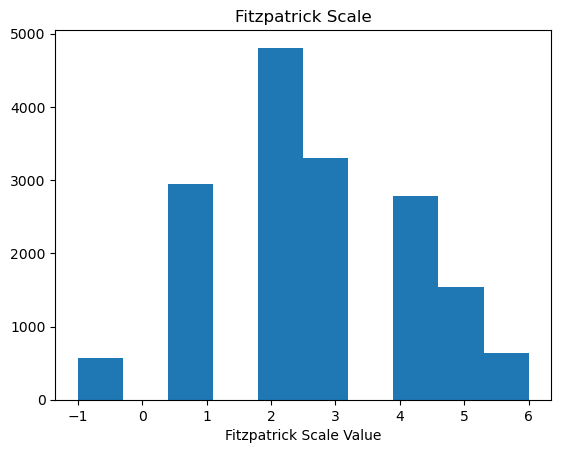

In [72]:
plt.hist(df['fitzpatrick_scale'])
plt.xlabel('Fitzpatrick Scale Value')
plt.title('Fitzpatrick Scale')
plt.show()

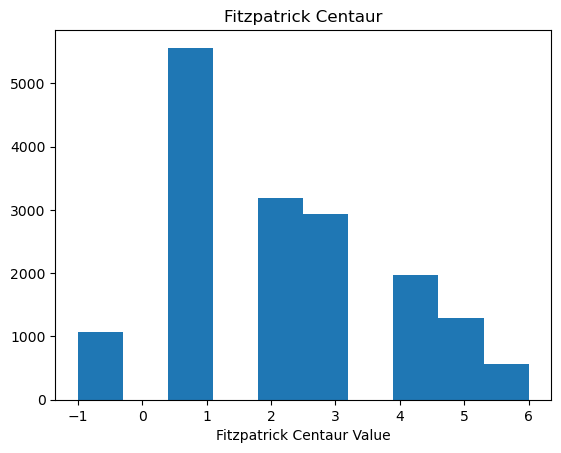

In [73]:
plt.hist(df['fitzpatrick_centaur'])
plt.xlabel('Fitzpatrick Centaur Value')
plt.title('Fitzpatrick Centaur')
plt.show()

# Preprocessing

### Downloading images

In [ ]:
url_nan = df[df['url'].isna()]

In [ ]:
url_nan['url'] = url_nan['url_alphanum'].apply(lambda x: 'https://' + x.replace('http', '').replace('www', 'www.').replace('com', '.com/').replace('images', '/images/').replace('clinicalpic', 'clinical-pic/').replace('jpg.jpg', '.jpg'))

In [ ]:
def transform_url(alpha_num_url):
    """
    Transforms the alphanumeric url into a valid url.
    These are the cases where there is a missing value in the url column.
    """

    base_url = 'https://www.dermaamin.com/site/images/'

    if 'clinical-pic/LLichensimplexchronicus' in alpha_num_url:
        folder_name = re.search(r'clinical-pic/(.+?)Lichen', alpha_num_url).group(1)
        file_name = re.search(r'Lichen(.+)\.jpg', alpha_num_url).group(1).replace('Lichen', '/Lichen').replace('simplex', ' simplex').replace('chronicus', ' chronicus')
        transformed_url = f"{base_url}clinical-pic/{folder_name}/Lichen {file_name.strip()}.jpg"

    elif 'histopicjjunctionnaevus' in alpha_num_url:
        folder_name = re.search(r'histopic(.+?)junction', alpha_num_url).group(1)
        file_name = re.search(r'junction(.+)\.jpg', alpha_num_url).group(1).replace('junction', '/junction-')
        transformed_url = f"{base_url}histo-pic/{folder_name}/junction-{file_name.strip()}.jpg"
    
    elif 'clinical-pic/ooralmucosalmelanoma' in alpha_num_url:
        folder_name = re.search(r'clinical-pic/(.+?)oral', alpha_num_url).group(1)
        file_name = re.search(r'oral(.+)\.jpg', alpha_num_url).group(1).replace('oral', '/oral- ').replace('mucosal', 'mucosal-')
        transformed_url = f"{base_url}clinical-pic/{folder_name}/oral- {file_name.strip()}.jpg"

    else:
        transformed_url = None	
    
    return transformed_url

In [ ]:
url_nan['url'] = url_nan['url'].apply(transform_url)

In [ ]:
# Filling the missing values in the url column on the original dataset
df['url'] = df['url'].fillna(url_nan['url'])

In [ ]:
def download_image(url, filename):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        decoded_url = unquote(url)

        response = requests.get(decoded_url, headers=headers, stream=True)
        if response.status_code == 200:
            with open(filename, 'wb') as file:
                file.write(response.content)
            return True
        else:
            print(f"Failed to download image from url: {url} (Status Code: {response.status_code})")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download image from url: {url} (Error: {e})")
    return False

for index, row in df.iterrows():
    url = row['url']
    filename = os.path.join('images', f'image_{index}.jpg')
    download_image(url, filename)

In [ ]:
for index in range(15555, 15598):  
    row = df.loc[index]
    url = row['url']
    filename = os.path.join('images', f'image_{index}.jpg')
    download_image(url, filename)

### Linking Images to the dataset

In [20]:
image_paths = []

# Linking the images using their name
# Images' names have the same suffix as the index of the dataframe e.g. image_15.jpg corresponds to the row with index 15
for i in df.index:
    image_name = f"image_{i}.jpg"
    image_path = os.path.join("original_images", image_name)
    if os.path.exists(image_path):
        image_paths.append(image_path)
    else:
        print(f"Broken url: {image_name} does not exist. Skipping...")

Broken url: image_12847.jpg does not exist. Skipping...
Broken url: image_13186.jpg does not exist. Skipping...
Broken url: image_13244.jpg does not exist. Skipping...
Broken url: image_13353.jpg does not exist. Skipping...
Broken url: image_13357.jpg does not exist. Skipping...
Broken url: image_13811.jpg does not exist. Skipping...
Broken url: image_13846.jpg does not exist. Skipping...
Broken url: image_14146.jpg does not exist. Skipping...
Broken url: image_15278.jpg does not exist. Skipping...
Broken url: image_15556.jpg does not exist. Skipping...


In [21]:
# Removing missing images
index = [12847, 13186, 13244, 13353, 13357, 13811, 13846, 14146, 15278, 15556]
df = df.drop(index)
df.shape

(16567, 9)

In [22]:
# Adding image_path column
df['image_path'] = image_paths

In [23]:
# Confirming that the images correspond to the correct df index
df.iloc[12845:12850]['image_path']

12845    original_images\image_12845.jpg
12846    original_images\image_12846.jpg
12848    original_images\image_12848.jpg
12849    original_images\image_12849.jpg
12850    original_images\image_12850.jpg
Name: image_path, dtype: object

In [24]:
# df with the useful columns
df = df[['fitzpatrick_scale','nine_partition_label','three_partition_label','image_path','label']]
df

,fitzpatrick_scale,nine_partition_label,three_partition_label,image_path,label
0,3,inflammatory,non-neoplastic,original_images\image_0.jpg,drug induced pigmentary changes
1,1,inflammatory,non-neoplastic,original_images\image_1.jpg,photodermatoses
2,2,benign dermal,benign,original_images\image_2.jpg,dermatofibroma
3,1,inflammatory,non-neoplastic,original_images\image_3.jpg,psoriasis
4,1,inflammatory,non-neoplastic,original_images\image_4.jpg,psoriasis
...,...,...,...,...,...
16572,5,inflammatory,non-neoplastic,original_images\image_16572.jpg,scleroderma
16573,4,inflammatory,non-neoplastic,original_images\image_16573.jpg,pityriasis rosea
16574,3,inflammatory,non-neoplastic,original_images\image_16574.jpg,myiasis
16575,-1,inflammatory,non-neoplastic,original_images\image_16575.jpg,vitiligo


In [25]:
df.isna().sum()

fitzpatrick_scale        0
nine_partition_label     0
three_partition_label    0
image_path               0
label                    0
dtype: int64

### Stratify based on labels + fitzpatrick scale

In [26]:
# Some combinations label + fitz sacle have only 1 image example, so we need to combine the fitzpatrick scales in ranges
df.groupby('fitzpatrick_scale')['label'].value_counts()

fitzpatrick_scale  label                       
-1                 squamous cell carcinoma         45
                   pediculosis lids                38
                   psoriasis                       31
                   scabies                         28
                   folliculitis                    25
                                                   ..
 6                 naevus comedonicus               1
                   nevocytic nevus                  1
                   nevus sebaceous of jadassohn     1
                   striae                           1
                   tick bite                        1
Name: count, Length: 756, dtype: int64

In [31]:
fitzpatrick_range_mapping = {
    '-1':'1-2',
    '1': '1-2',
    '2': '1-2',  # mapping scales -1(unkown),1 and 2 to 1-2 range
    
    '3': '3-6',
    '4': '3-6',
    '5': '3-6',
    '6': '3-6',  # mapping scales 3, 4, 5 and 6 to 3-6 range
}
df['fitzpatrick_range'] = df['fitzpatrick_scale'].astype(str).map(fitzpatrick_range_mapping)
df[['fitzpatrick_scale','fitzpatrick_range']].sample(5)

,fitzpatrick_scale,fitzpatrick_range
11746,4,3-6
8557,5,3-6
3117,3,3-6
11088,1,1-2
6133,2,1-2


In [32]:
# Now we have multiple examples of each fitzpatrick scale / label combination
df.groupby('fitzpatrick_range')['label'].value_counts()

fitzpatrick_range  label                            
1-2                psoriasis                            376
                   squamous cell carcinoma              325
                   allergic contact dermatitis          269
                   basal cell carcinoma                 249
                   acne vulgaris                        224
                                                       ... 
3-6                aplasia cutis                         13
                   perioral dermatitis                   12
                   pilomatricoma                         11
                   solid cystic basal cell carcinoma     11
                   basal cell carcinoma morpheiform       6
Name: count, Length: 228, dtype: int64

### Data split

In [33]:
# Splitting the data into train (70%) and temporary (30%)
train_df, temp_df = train_test_split(df, test_size=0.3,
                                     random_state=42,
                                     stratify=df[['label', 'fitzpatrick_range']])

# Splitting the temporary data into validation (50%) and test (50%)
validation_df, test_df = train_test_split(temp_df, test_size=0.5,
                                          random_state=42,
                                          stratify=temp_df[['label', 'fitzpatrick_range']])

# Confirming the sizes of the splits
print("Train size:", len(train_df))
print("Validation size:", len(validation_df))
print("Test size:", len(test_df))

Train size: 11596
Validation size: 2485
Test size: 2486


In [74]:
def move_images_to_folders(data, split_name, main_folder='images_split'):
    
    split_folder = os.path.join(main_folder, split_name)

    for index, row in data.iterrows():
        image_path = row['image_path']
        label = row['label']
        image_name = os.path.basename(image_path)
        destination_folder = os.path.join(split_folder, label)
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)
        shutil.copy(image_path, os.path.join(destination_folder, image_name))
    
    print(f"{split_name} images. Done!")

In [75]:
# Moving images to Training, Validation and Test folders
move_images_to_folders(train_df, 'Training')
move_images_to_folders(validation_df, 'Validation')
move_images_to_folders(test_df, 'Test')

Training images. Done!
Validation images. Done!
Test images. Done!


# Defining images paths

In [34]:
# path to the images folder
data_dir = Path('original_images')

# path to Training, Validation and Test images folders
train_dir = Path('images_split/Training')
val_dir = Path('images_split/Validation')
test_dir = Path('images_split/Test')